#Imports and Data

In [2]:
import pandas as pd
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')


filepath_askreddit = "/content/drive/MyDrive/adhdreddit/FinalData/askreddit_posts_cleaned.csv"
#Read documents
df = pd.read_csv(filepath_askreddit, error_bad_lines=False)
df = df.drop(columns = ["title","selftext","content_copy","Unnamed: 0"])


df["content"] = df["content"].str.lower()

#make posts into list of documents
docs = df["content"].tolist()
# Tokenize the documents.
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.



# remove stop words
stop_words = stopwords.words('english')

docs = [[word.lower() for word in doc if word.isalpha()] for doc in docs]

docs = [[word for word in doc if word not in stop_words] for doc in docs]

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

# Lemmatize the documents.
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

phrases = Phrases(docs, min_count=1000, threshold=2,delimiter=b' ')
bigrams = Phraser(phrases)
bigram_token = []
for sent in docs:
    bigram_token.append(bigrams[sent])

print(bigram_token)
# Create a corpus from a list of texts
common_dictionary = Dictionary(docs)
common_corpus = [common_dictionary.doc2bow(text) for text in docs]





[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Finding number of topics


In [ ]:
from gensim.models import CoherenceModel

topics = [1,5,10,15,20,25,30,35,40,45]
perplexity = []
coherence = []
models = []
for number in topics:
  print(number)
  lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=number,random_state=50)
  perplexity_lda = lda_model.log_perplexity(common_corpus)
  perplexity.append(perplexity_lda)# a measure of how good the model is. lower the better.
  models.append(lda_model)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence.append(coherence_lda)
  print('\nCoherence Score: ', coherence_lda)




1

Coherence Score:  0.11332769833285435
5

Coherence Score:  0.2527319056381919
10

Coherence Score:  0.315035450769572
15

Coherence Score:  0.28933828956338503
20

Coherence Score:  0.29001551953567767
25

Coherence Score:  0.27415459188519814
30

Coherence Score:  0.2543970143701525
35

Coherence Score:  0.2577718158664246
40

Coherence Score:  0.2580889753399354
45

Coherence Score:  0.25536485565244416


In [ ]:
coherence

In [ ]:
from gensim.models import CoherenceModel

topics_2 = [6,7,8,9,11,12]
perplexity = []
coherence_2 = []
models = []
for number in topics_2:
  print(number)
  lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=number,random_state=50)
  perplexity_lda = lda_model.log_perplexity(common_corpus)
  perplexity.append(perplexity_lda)# a measure of how good the model is. lower the better.
  models.append(lda_model)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_2.append(coherence_lda)
  print('\nCoherence Score: ', coherence_lda)




6

Coherence Score:  0.2534416691238103
7

Coherence Score:  0.30495525282582625
8

Coherence Score:  0.3010276568581266
9

Coherence Score:  0.2980462780772438
11

Coherence Score:  0.320920598412045
12

Coherence Score:  0.29386414127178073


In [ ]:
lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=13)
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.27904485205514595


In [ ]:
coherence = coherence+coherence_2
topics = topics = [1,5,6,7,10,15,20,25,30,35,40,45]+topics_2

TypeError: ignored

In [ ]:
coherence

[0.11332769833285435,
 0.2527319056381919,
 0.315035450769572,
 0.28933828956338503,
 0.29001551953567767,
 0.27415459188519814,
 0.2543970143701525,
 0.2577718158664246,
 0.2580889753399354,
 0.25536485565244416,
 0.2534416691238103,
 0.30495525282582625,
 0.3010276568581266,
 0.2980462780772438,
 0.320920598412045,
 0.29386414127178073,
 0.2534416691238103,
 0.30495525282582625,
 0.3010276568581266,
 0.2980462780772438,
 0.320920598412045,
 0.29386414127178073]

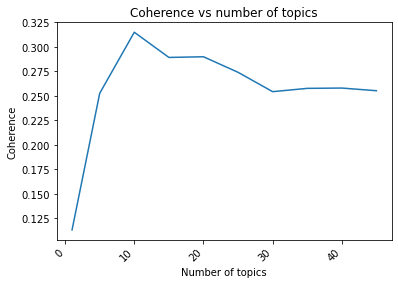

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot(x=topics, y=coherence)
plt.xticks(rotation=45, ha='right')
sns.color_palette("Blues", as_cmap=True)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence vs number of topics for r/AskReddit")
plt.show()

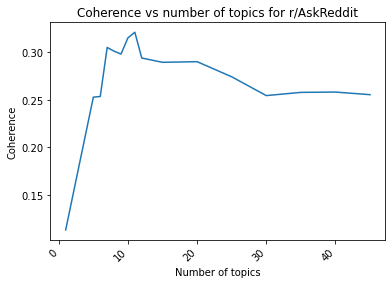

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot(x=topics, y=coherence[:16])
plt.xticks(rotation=45, ha='right')
sns.color_palette("Blues", as_cmap=True)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence vs number of topics for r/AskReddit")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.lineplot(x=topics, y=coherence)
plt.xticks(rotation=45, ha='right')
sns.color_palette("Blues", as_cmap=True)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence vs number of topics")
plt.show()

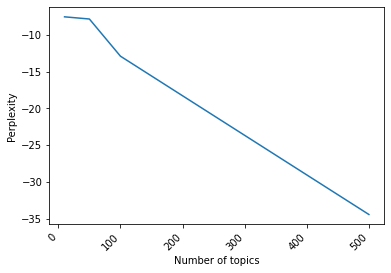

In [ ]:

ax = sns.lineplot(x=topics, y=perplexity)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Number of topics")
plt.title("Perplexity vs number of topics")
plt.ylabel("Perplexity")
plt.show()

In [ ]:
from gensim.models import CoherenceModel

topics = [10,15,20,25,30,40]
perplexity = []
coherence = []
models = []
for number in topics:
  print(number)
  lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=number,random_state=50)
  perplexity_lda = lda_model.log_perplexity(common_corpus)
  perplexity.append(perplexity_lda)# a measure of how good the model is. lower the better.
  models.append(lda_model)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence.append(coherence_lda)
  print('\nCoherence Score: ', coherence_lda)
  print("Topics for", number, lda_model.show_topics(num_topics=50, num_words=5,formatted=False))




10

Coherence Score:  0.4111919282421684
Topics for 10 [(0, [('eat', 0.022237113), ('food', 0.019611962), ('eating', 0.016803883), ('weight', 0.010720405), ('water', 0.0080651855)]), (1, [('get', 0.024650062), ('day', 0.023307566), ('time', 0.02105225), ('thing', 0.015853804), ('work', 0.015782978)]), (2, [('month', 0.017816477), ('week', 0.013023226), ('get', 0.013011504), ('got', 0.011500628), ('back', 0.010158597)]), (3, [('like', 0.037090275), ('feel', 0.024060415), ('thing', 0.018230349), ('know', 0.017207079), ('people', 0.016210508)]), (4, [('school', 0.031621035), ('year', 0.016196284), ('class', 0.015591117), ('time', 0.01416679), ('get', 0.012815676)]), (5, [('game', 0.0122224325), ('video', 0.0114328945), ('book', 0.01016143), ('use', 0.009128646), ('read', 0.009087699)]), (6, [('job', 0.03092622), ('work', 0.020425336), ('year', 0.0119332), ('kid', 0.010215979), ('home', 0.009341314)]), (7, [('life', 0.02034289), ('feel', 0.01650521), ('like', 0.01265092), ('thing', 0.01198

# Chosen model


In [3]:
lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=12,random_state=50)


In [4]:
from collections import Counter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
topics = lda_model.show_topics(num_topics=35,num_words=5,formatted=False)

data_flat = [w for w_list in common_texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(30,50), sharey=True, dpi=300)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]*4
for i, ax in enumerate(axes.flatten()):
    print(i)
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.5, label='Weights')
    ax.set_ylabel('Importance',fontsize = 20 , color=cols[i])
    ax.set_ylim(0, 0.080)
    ax.set_title('Topic: ' + str(i), fontsize= 30,color=cols[i])
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], fontsize= 20,rotation=30, horizontalalignment= 'right')
    
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

0
1
2
3
4
5


In [5]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(30,50), sharey=True, dpi=300)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]*4
for i, ax in enumerate(axes.flatten()):
    i = i +3
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.5, label='Weights')
    ax.set_ylabel('Importance',fontsize = 20 , color=cols[i])
    ax.set_ylim(0, 0.080)
    ax.set_title('Topic: ' + str(i), fontsize= 30,color=cols[i])
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], fontsize= 20,rotation=30, horizontalalignment= 'right')
    
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Documents

In [ ]:
doc_topic = lda_model.get_document_topics(common_corpus)
tops = sorted(doc_topic, reverse=True, key=lambda doc: abs(dict(doc).get(1, 0.0)))

In [ ]:
import gensim
import numpy as np

all_topics_csr = gensim.matutils.corpus2csc(doc_topic)
all_topics_numpy = all_topics_csr.T.toarray()

In [ ]:
all_topics_numpy

In [ ]:
token2id = common_dictionary.token2id
doc_topic
def id2token(id):
 return list(token2id.keys())[list(token2id.values()).index(id)]


isnt


##Clusters

In [ ]:
# Plotting tools
!pip install pyLDAvis


import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, common_corpus, common_dictionary)
vis


##Worcloud

In [ ]:
def create_wordcloud(model, topic,color):
    text = {word: value for word, value in model.show_topic(topic,30)}
    wc = WordCloud(background_color="white", max_words=5,color_func=lambda *args, **kwargs: cols[i],)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
for i in range(0,20):
    create_wordcloud(lda_model, topic =i,color =  cols[i])

In [ ]:
docsVStopics = lda_model.transform(dtm)
docsVStopics = pd.DataFrame(docsVStopics, columns=["Topic"+str(i+1) for i in range(N_TOPICS)])
print("Created a (%dx%d) document-topic matrix." % (docsVStopics.shape[0], docsVStopics.shape[1]))
docsVStopics.head()